
# 1 Data Wrangling <a id='1_Data_Wrangling'></a>
---

## 1.1 Contents <a id='1.1_Contents'></a>
- [1 Data Wrangling](#1_Data_Wrangling)
    - [1.1 Contents](#1.1_Contents)
    - [1.2 Introduction](#1.2_Introduction)
    - [1.3 Importing](#1.3_Importing)
    - [1.4 Loading The Data](#1.4_Loading_the_data)
- [1.5 Preliminary Exploration](#1.5_Preliminary_exploration)
    - [1.5.1 Missing Values](#1.5.1_Missing_values)
    - [1.5.2 Duplicate Values](#1.5.2_Duplicate_values)
- [1.6 A Look Into Categorical Features](#1.6_Categorical_Features)
- [1.7 A Look Into Numerical Features](#1.7_Numerical_Features) 
    - [1.7.1 Target Feature](#1.7.1_Target_Feature)
- [1.8 Save the data](#1.8_Save_data)
- [1.9 Summary](#1.9_Summary)

## 1.2 Introduction <a id='1.2_Introduction'></a>

#### Purpose:
This notebook focuses on collecting your data, organizing it, and making sure it's well defined.

#### Problem Statement:
The purpose of this data science project involves predicting the age and sex of individuals who become victims of crime using crime data and potentially other relevant variables. By analyzing patterns within crime data, we aim to develop predictive models that estimate the age and sex of victims, which can have applications in law enforcement, victim support and aid victim service providers target relevant areas.

## 1.3 Importing <a id='1.3_Importing'></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

## 1.4 Loading The Crime Data <a id='1.4_Loading_the_data'></a>

In [5]:
# Storing file path in variable and then using pd.read_csv() to load the data as a dataframe into crimeData

dataFilePath = "/Users/frankyaraujo/Development/Springboard_Main/Capstone Two/\
Springboard-Capstone-Two/src/data/2010-2023 Crime_Traffic_Collisions_Data .csv"
crimeData = pd.read_csv(dataFilePath, low_memory = False)

## 1.5 Preliminary Exploration <a id='1.5_Preliminary_exploration'></a>

In [6]:
crimeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375881 entries, 0 to 1375880
Data columns (total 28 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Unnamed: 0              1375881 non-null  int64  
 1   DR Number               1375881 non-null  int64  
 2   Date Reported           1375881 non-null  object 
 3   Date Occurred           1375881 non-null  object 
 4   Time Occurred           1375881 non-null  int64  
 5   Area ID                 1375881 non-null  int64  
 6   Area Name               1375881 non-null  object 
 7   Reporting District      1375881 non-null  int64  
 8   Crime Code              1375881 non-null  int64  
 9   Crime Code Description  1375881 non-null  object 
 10  MO Codes                1181546 non-null  object 
 11  Victim Age              1290351 non-null  float64
 12  Victim Sex              1263940 non-null  object 
 13  Victim Descent          1262997 non-null  object 
 14  Pr

In [7]:
crimeData.head()

,Unnamed: 0,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,Address,Cross Street,LAT,LON
0,0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


##### Initial observations after using the .info() and .head() methods:
- The 'Unnamed: 0' doesn't seeme to serve a purpose as it appears to be equivalent to the index
- Not all Object Types appear to be categorical (ie Date Reported, Date Occurred, and Time Occurred) and not all Float64 Types appear to be numercial types (ie Premise Code, Weapon Used Cd, Crm Cd 1, Crm Cd 2, Crm Cd 3, Crm Cd 4)
- The area names may have abbreviations so this needs to be kept in min when reviewing for duplicates
- The 'Crime Code Description' and 'MO Codes'columns may hold multiple data values/point per value
- age and sex of victims are found within the 'Victim Age' and 'Victim Sex' columns so our target variables are present


### 1.5.1 Missing Values <a id='1.5.1_Missing_values'></a>

In [8]:
# The number of missing values per column

crimeData.isna().sum()
crimeDataMissing = pd.DataFrame(crimeData.isna().sum())
crimeDataMissing.columns = ['Total # of missing values']

In [9]:
# The percentage of missing values per column, sorted from highest to lowest

crimeDataMissing['% of missing values'] = crimeData.isna().sum().sort_values(ascending = False)/len(crimeData.index)*100

In [10]:
# Number of missing values and percentages by column, sorted from highest to lowest

crimeDataMissing.sort_values(by = "Total # of missing values", ascending = False)

,Total # of missing values,% of missing values
Crm Cd 4,1375824,99.995857
Crm Cd 3,1373962,99.860526
Crm Cd 2,1318357,95.819115
Weapon Used Cd,1104689,80.289574
Weapon Desc,1104689,80.289574
Cross Street,682926,49.635543
Crm Cd 1,596088,43.324096
Status Desc,596078,43.323369
Status,596078,43.323369
MO Codes,194335,14.124405


##### Some notes on missing data

- 99% of 'Crm Cd 4' and 'Crm Cd 3'are missing and 95% of 'Crm Cd 2' is missing - If there is no value in keeping these columns to reflect the missing data, then these will be dropped before moving on past data wrangling. The same approach will be taken with 'Weapon Used Cd' and 'Weapon Desc' since ~80% of these columns are missing. 

- 49% of 'Cross Street' values are missing but this will not matter since all LAT and LON values are present and will provide a much easier path to evaluating areas. 43% of each 'Crm Cd', 'Status Desc', and 'Status' columns is missing which is a substantial amount of missing data, which can have implications for analysis and processes so this will be kept in mind and the columns may need to be dropped.  



In [11]:
# The focus is on Victim Age and Sex so let's take a quick closer look at those columns

crimeData[crimeData['Victim Age'].notna()]['Victim Age'].unique()

array([ 36.,  25.,   0.,  76.,  31.,  23.,  29.,  35.,  41.,  24.,  34.,
        46.,  66.,  40.,  27.,  62.,  43.,  71.,  50.,  19.,  51.,  33.,
        69.,  39.,  57.,  78.,  52.,  38.,  55.,  44.,  18.,  54.,  22.,
        28.,  42.,  56.,  67.,  37.,  60.,  61.,  59.,  32.,  30.,  45.,
        20.,  15.,  58.,  47.,  48.,  26.,  21.,  64.,  75.,  12.,  49.,
        68.,  14.,  13.,  10.,  53.,  74.,  17.,  65.,  63.,   8.,  16.,
        72.,  70.,   9.,  90.,  85.,  81.,  79.,  94.,  73.,  11.,  80.,
         5.,  82.,   2.,  77.,  84.,  88.,  96.,  99.,   7.,  86.,  92.,
         3.,  83.,  87.,   6.,  -1.,  89.,   4.,  93.,  98.,  91.,  95.,
        97., 120.,  -2.,  -3.])

In [12]:
crimeData[crimeData['Victim Sex'].notna()]['Victim Sex'].unique()

array(['F', 'M', 'X', 'H', '-', 'N'], dtype=object)

- It looks like there may be more missing values than originally shown ussing the method .isna() above. 
For 'Victim Age', it looks like there are error values (ie less than '0') and, for 'Victim Sex', there are values that do not represent Male or Female (ie 'X', 'H','-', and 'N') This will be explored next along with duplicate values (if any)

### 1.5.2 Duplicate Values <a id='1.5.2_Duplicate_values'></a>

In [13]:
# Brief look at potential duplicate obeservations
# Using .duplicated() and .sum() to find all duplicates, mark them as True, and sum the amount of True's 

crimeData.duplicated(keep=False).sum()

0

- Comparing full rows brings up no duplicates so let's take a look at some of the individual variables and combination of variables to ensure there are no duplicate values. 

In [14]:
# Each reported incident should have a unique Division of Record Number within'DR Number'

# Subsetting the crime data to show all duplicate values based on 'DR Number' and then sorting by 'DR Number'
# brings up the following

crimeDataDuplicates = crimeData[crimeData.duplicated(subset=['DR Number'],keep=False)].sort_values(by = "DR Number")

In [15]:
# Lets see if these reported incidents occured on the same date, time and place

print("# of Duplicates based on 'Date Occurred', 'Time Occurred', 'Address', 'Cross Street', 'LAT' and 'LON' columns: ", \
crimeDataDuplicates.loc[:,['Date Occurred','Time Occurred','Address','Cross Street','LAT','LON']].duplicated().sum())

# Lets look at specific columns since the above only flagged one duplicate

print("# of Duplicates based on 'LAT' and 'LON' columns: ", \
    crimeDataDuplicates.loc[:,['LAT','LON']].duplicated().sum())

print("# of Duplicates based on 'Address' and 'Cross Street' columns: ", \
crimeDataDuplicates.loc[:,['Address','Cross Street']].duplicated().sum())

print("# of Duplicates based on 'Date Occurred' column: ", \
crimeDataDuplicates.loc[:,['Date Occurred']].duplicated().sum())

print("# of Duplicates based on 'Time Occurred' column: ", \
crimeDataDuplicates.loc[:,['Time Occurred']].duplicated().sum())

# of Duplicates based on 'Date Occurred', 'Time Occurred', 'Address', 'Cross Street', 'LAT' and 'LON' columns:  2
# of Duplicates based on 'LAT' and 'LON' columns:  51
# of Duplicates based on 'Address' and 'Cross Street' columns:  54
# of Duplicates based on 'Date Occurred' column:  21
# of Duplicates based on 'Time Occurred' column:  101


In [16]:
# It looks like the 'Date Occurred' columns will create more unique values than available due to the different formatting
# For example, '01/22/2020' is not equivalent to '01/22/2020' 12:00:00 AM' so let's format to get a better result

crimeDataDuplicates['Date Occurred'] = crimeDataDuplicates['Date Occurred'].apply(lambda x: x[0:10])

In [17]:
# After formatting the 'Date Occurred' column, more duplicates are found

print("# of Duplicates based on 'Date Occurred' column: ", \
crimeDataDuplicates.loc[:,['Date Occurred']].duplicated().sum())


# of Duplicates based on 'Date Occurred' column:  91


In [18]:
# A quick look at crimeDataDuplicates using the .head() method created a suspicion that the duplicates were coming 
# from Traffic Collision rows and it is further supported by the count below - showing 101 rows for records with
# 'TRAFFIC COLLISION' for the 'Crime Code Description' which is half of the 202 duplicates flagged above

crimeDataDuplicates[crimeDataDuplicates['Crime Code Description']=='TRAFFIC COLLISION'].count()

Unnamed: 0                101
DR Number                 101
Date Reported             101
Date Occurred             101
Time Occurred             101
Area ID                   101
Area Name                 101
Reporting District        101
Crime Code                101
Crime Code Description    101
MO Codes                   93
Victim Age                 74
Victim Sex                 97
Victim Descent             97
Premise Code              101
Premise Description       101
Weapon Used Cd              0
Weapon Desc                 0
Status                      0
Status Desc                 0
Crm Cd 1                    0
Crm Cd 2                    0
Crm Cd 3                    0
Crm Cd 4                    0
Address                   101
Cross Street               81
LAT                       101
LON                       101
dtype: int64

In [19]:
# Let's decide if we should drop or keep the 'TRAFFIC COLLISION' rows by seeing whether 
# these rows have more information

# missingDataTrafficRelated will have total missing values per column for 'TRAFFIC COLLISION' related data
# missingDataNonTrafficRelated will have total missing values per column for Non -'TRAFFIC COLLISION' related data

missingDataTrafficRelatedDups = crimeDataDuplicates[crimeDataDuplicates['Crime Code Description']=='TRAFFIC COLLISION']
missingDataNonTrafficRelatedDups = crimeDataDuplicates[~(crimeDataDuplicates['Crime Code Description']=='TRAFFIC COLLISION')]


In [20]:
# Comparison of variables created in previous cell
# Boolean expression below will show where TRAFFIC COLLISION' related data has more information

(missingDataTrafficRelatedDups.isna().sum() < missingDataNonTrafficRelatedDups.isna().sum())\
.sort_values(ascending=False)

Cross Street               True
MO Codes                   True
Victim Sex                 True
Victim Descent             True
Unnamed: 0                False
Weapon Used Cd            False
LAT                       False
Address                   False
Crm Cd 4                  False
Crm Cd 3                  False
Crm Cd 2                  False
Crm Cd 1                  False
Status Desc               False
Status                    False
Weapon Desc               False
Premise Code              False
Premise Description       False
DR Number                 False
Victim Age                False
Crime Code Description    False
Crime Code                False
Reporting District        False
Area Name                 False
Area ID                   False
Time Occurred             False
Date Occurred             False
Date Reported             False
LON                       False
dtype: bool

- It looks like there are columns where the Traffic Collision records have more information but the majority of information lies within the non-traffic records (ie 'Crime Code Description' not equal to 'TRAFFIC COLLISION') so these rows have meaningful information
- Since there are only 101 duplicates within a dataset with over 1.3M obdervations and all the duplicates have relevant values, the duplicates don't need to be dropped 

## 1.6 A Look Into Categorical Features <a id='1.6_Categorical_Features'></a>

In [21]:
crimeData.select_dtypes('object')

,Date Reported,Date Occurred,Area Name,Crime Code Description,MO Codes,Victim Sex,Victim Descent,Premise Description,Weapon Desc,Status,Status Desc,Address,Cross Street
0,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,Southwest,BATTERY - SIMPLE ASSAULT,0444 0913,F,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,NaN
1,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,Central,BATTERY - SIMPLE ASSAULT,0416 1822 1414,M,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,NaN
2,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,Central,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,X,X,POLICE FACILITY,NaN,AA,Adult Arrest,200 E 6TH ST,NaN
3,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,IC,Invest Cont,5400 CORTEEN PL,NaN
4,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,X,X,BEAUTY SUPPLY STORE,NaN,IC,Invest Cont,14400 TITUS ST,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375876,08/07/2023,08/07/2023,Topanga,TRAFFIC COLLISION,3006 3028 4026 3033 3034 3037,M,W,STREET,NaN,NaN,NaN,DEERING AV,SATICOY ST
1375877,08/08/2023,08/03/2023,West LA,TRAFFIC COLLISION,3003 3026 3029 3035 3036 3101 3401 3701 4008,M,H,STREET,NaN,NaN,NaN,LA CIENEGA BL,GUTHRIE AV
1375878,08/06/2023,08/06/2023,N Hollywood,TRAFFIC COLLISION,3004 3026 4015 3029 3036 3101,F,O,STREET,NaN,NaN,NaN,VANOWEN ST,FULTON AV
1375879,08/08/2023,08/08/2023,N Hollywood,TRAFFIC COLLISION,NaN,M,H,STREET,NaN,NaN,NaN,FARMDALE AV,OXNARD ST


The following observations can be made reviewing the cell above: 
- 'Date Reported' and 'Date Occured' may need to be converted to datetime
- 'Area Name' will need to be reviewed for any abbreviations, misspelled words, and any other string errors
- 'Victim Sex' will need to be evaluated since there other values other than 'F' and 'M'
- Does 'Status' always match with 'Status Desc'

In [22]:
# To see whether Date Reported and Date Occurred need to be converted, lets check the type
crimeData['Date Reported'].dtypes, crimeData['Date Occurred'].dtypes

(dtype('O'), dtype('O'))

In [23]:
# Before changing the dataset, a copy is made to keep the original dataset within crimeData
crimeDataAdj = crimeData

# Converting columns to datetime
crimeDataAdj['Date Reported'] = pd.to_datetime(crimeDataAdj['Date Reported'])
crimeDataAdj['Date Occurred'] = pd.to_datetime(crimeDataAdj['Date Occurred'])

In [24]:
crimeDataAdj.select_dtypes('object')

,Area Name,Crime Code Description,MO Codes,Victim Sex,Victim Descent,Premise Description,Weapon Desc,Status,Status Desc,Address,Cross Street
0,Southwest,BATTERY - SIMPLE ASSAULT,0444 0913,F,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,NaN
1,Central,BATTERY - SIMPLE ASSAULT,0416 1822 1414,M,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,NaN
2,Central,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,X,X,POLICE FACILITY,NaN,AA,Adult Arrest,200 E 6TH ST,NaN
3,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,IC,Invest Cont,5400 CORTEEN PL,NaN
4,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,X,X,BEAUTY SUPPLY STORE,NaN,IC,Invest Cont,14400 TITUS ST,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1375876,Topanga,TRAFFIC COLLISION,3006 3028 4026 3033 3034 3037,M,W,STREET,NaN,NaN,NaN,DEERING AV,SATICOY ST
1375877,West LA,TRAFFIC COLLISION,3003 3026 3029 3035 3036 3101 3401 3701 4008,M,H,STREET,NaN,NaN,NaN,LA CIENEGA BL,GUTHRIE AV
1375878,N Hollywood,TRAFFIC COLLISION,3004 3026 4015 3029 3036 3101,F,O,STREET,NaN,NaN,NaN,VANOWEN ST,FULTON AV
1375879,N Hollywood,TRAFFIC COLLISION,NaN,M,H,STREET,NaN,NaN,NaN,FARMDALE AV,OXNARD ST


<Axes: title={'center': 'Number of Reported Crimes by Area'}, xlabel='Number of crimes reports', ylabel='Area'>

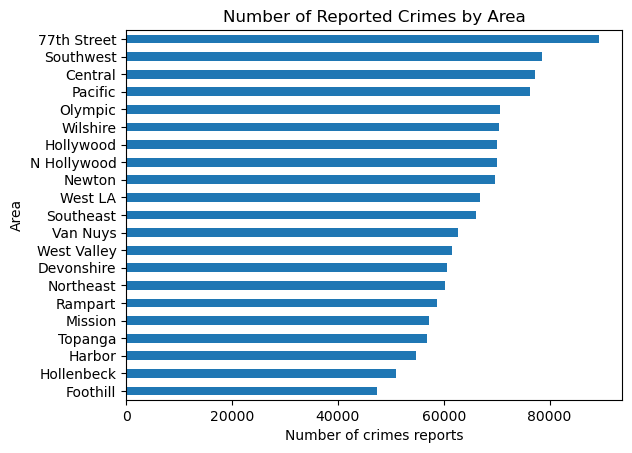

In [25]:
# Distribution of area names as bar plot

crimeDataAdj['Area Name'].value_counts().sort_values().plot(kind='barh', xlabel = "Number of crimes reports",\
                                                    ylabel ='Area', title = "Number of Reported Crimes by Area")

In [26]:
# A quick look at the number of unique Crime Code Descriptions

crimeDataAdj['Crime Code Description'].nunique()


139

In [27]:
# A quick look at the number of unique MO Codes

crimeDataAdj['MO Codes'].nunique()

370931

- Important Note: There are several MO Codes per value in some cases (ie '0416 1822 1414'), each code is separated by a space

**Victim Sex** 

<Axes: >

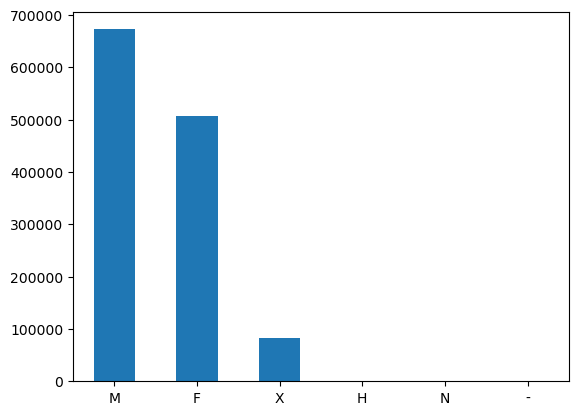

In [28]:
crimeDataAdj['Victim Sex'].value_counts().plot(kind = 'bar', rot = 0)

- Per the dataset source (https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8) 'X'represents unknown but there are not descriptions for 'H' and 'N'
- 'H' and 'N' are essentially unknown so these can be changed to 'X'

In [29]:
crimeDataAdj['Victim Sex'].value_counts()

M    672646
F    507438
X     83585
H       257
N        11
-         3
Name: Victim Sex, dtype: int64

In [30]:
crimeDataAdj['Victim Sex'].isna().count()

1375881

In [31]:
# Changing all values that are not 'M' or 'F' into 'X' representing unknown

def bio_sex_check(inputvar):
    if (inputvar == 'M' or inputvar =='F'):
        return inputvar
    else:
        return 'X'
    
crimeDataAdj['Victim Sex'] = crimeDataAdj['Victim Sex'].apply(lambda x: bio_sex_check(x))

M    48.89
F    36.88
X    14.23
Name: Victim Sex, dtype: float64


<Axes: title={'center': 'Percentage of Victims by Sex Assigned at Birth'}, xlabel='Victim Sex (M - Male, F - Female, X - Unknown)', ylabel='Percentage'>

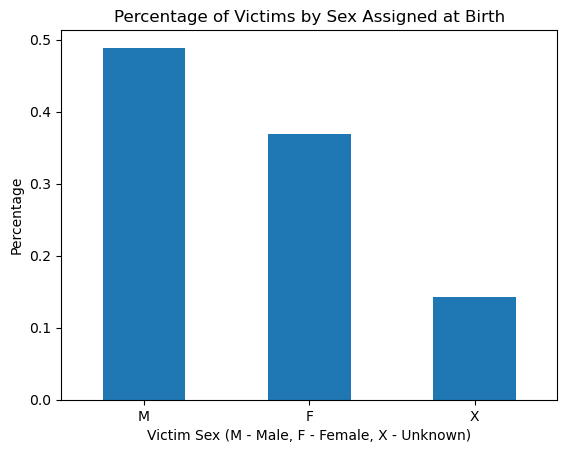

In [32]:
print(round(crimeDataAdj['Victim Sex'].value_counts(normalize=True)*100,2))

crimeDataAdj['Victim Sex'].value_counts(normalize=True).plot(kind = 'bar', rot = 0, \
                                               xlabel = 'Victim Sex (M - Male, F - Female, X - Unknown)',\
                        ylabel = 'Percentage', title = 'Percentage of Victims by Sex Assigned at Birth')

**Victim Descent**

Per the dataset source (https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8)

Descent Code: 
- A - Other Asian 
- B - Black 
- C - Chinese 
- D - Cambodian 
- F - Filipino 
- G - Guamanian 
- H - Hispanic/Latin/Mexican 
- I - American Indian/Alaskan Native 
- J - Japanese 
- K - Korean 
- L - Laotian 
- O - Other 
- P - Pacific Islander 
- S - Samoan 
- U - Hawaiian 
- V- Vietnamese 
- W - White 
- X - Unknown 
- Z - Asian Indian

In [33]:
crimeDataAdj['Victim Descent'].unique()

array(['B', 'H', 'X', 'W', 'A', 'O', nan, 'C', 'F', 'K', 'I', 'V', 'Z',
       'J', 'P', 'G', 'U', 'D', 'S', 'L', '-'], dtype=object)

- To make this column easier to understand, the code will be replaced by the actual description

In [34]:
# Dictionary created from descent codes

descent_dict = {
    'A': 'Other Asian',
    'B': 'Black',
    'C': 'Chinese',
    'D': 'Cambodian',
    'F': 'Filipino',
    'G': 'Guamanian',
    'H': 'Hispanic/Latin/Mexican',
    'I': 'American Indian/Alaskan Native',
    'J': 'Japanese',
    'K': 'Korean',
    'L': 'Laotian',
    'O': 'Other',
    'P': 'Pacific Islander',
    'S': 'Samoan',
    'U': 'Hawaiian',
    'V': 'Vietnamese',
    'W': 'White',
    'X': 'Unknown',
    'Z': 'Asian Indian',
    '-': 'Unknown'
}

# using .map() method to replace codes with full description of descent 
crimeDataAdj['Victim Descent'] = crimeDataAdj['Victim Descent'].map(descent_dict)

In [35]:
# Replacing NaN with Unknown
crimeDataAdj['Victim Descent'].fillna(value = 'Unknown', inplace= True)

<Axes: title={'center': 'Victim Counts by Descent'}, xlabel='Counts', ylabel='Victim Descent'>

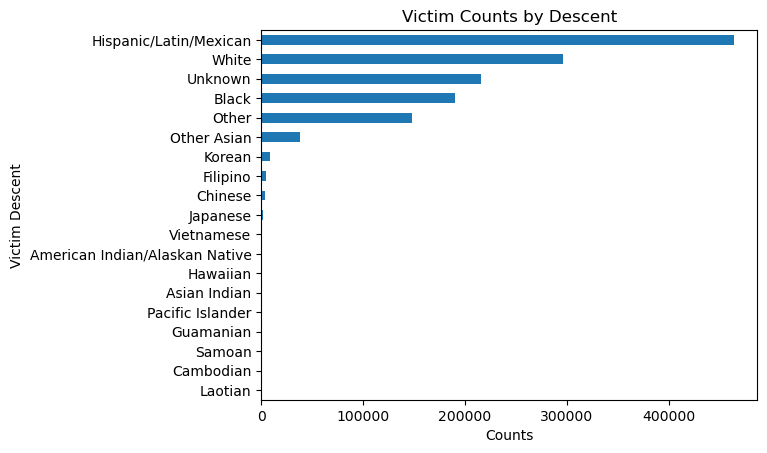

In [36]:
crimeDataAdj['Victim Descent'].value_counts().sort_values().plot(kind ='barh', ylabel ='Victim Descent',\
                                                    xlabel = 'Counts', title ='Victim Counts by Descent')

- At this point, It is not clear whether the following variables will contribute to model training: 'Premise Description', 'Weapon Desc', 'Status', 'Status Desc', 'Address', 'Cross Street'
- For now, the next step would be to look at the numerical features

## 1.7 A Look Into Numerical Features <a id='1.7_Numerical_Features'></a>

In [37]:
crimeDataNumerical = crimeDataAdj.select_dtypes(exclude='object')
crimeDataNumerical.head()


,Unnamed: 0,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Reporting District,Crime Code,Victim Age,Premise Code,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
0,0,10304468,2020-01-08,2020-01-08,2230,3,377,624,36.0,501.0,400.0,624.0,NaN,NaN,NaN,34.0141,-118.2978
1,1,190101086,2020-01-02,2020-01-01,330,1,163,624,25.0,102.0,500.0,624.0,NaN,NaN,NaN,34.0459,-118.2545
2,2,200110444,2020-04-14,2020-02-13,1200,1,155,845,0.0,726.0,NaN,845.0,NaN,NaN,NaN,34.0448,-118.2474
3,3,191501505,2020-01-01,2020-01-01,1730,15,1543,745,76.0,502.0,NaN,745.0,998.0,NaN,NaN,34.1685,-118.4019
4,4,191921269,2020-01-01,2020-01-01,415,19,1998,740,31.0,409.0,NaN,740.0,NaN,NaN,NaN,34.2198,-118.4468


In [38]:
# Summary statistics

crimeDataNumerical.describe()

,Unnamed: 0,DR Number,Time Occurred,Area ID,Reporting District,Crime Code,Victim Age,Premise Code,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,1.375881e+06,1.375881e+06,1.375881e+06,1.375881e+06,1.375881e+06,1.375881e+06,1.290351e+06,1.374913e+06,271192.000000,779793.000000,57524.000000,1919.000000,57.000000,1.375881e+06,1.375881e+06
mean,6.879400e+05,1.905465e+08,1.343433e+03,1.087445e+01,1.133660e+03,7.157330e+02,3.440786e+01,2.177699e+02,362.680857,500.474448,957.441068,983.781136,990.368421,3.400193e+01,-1.180981e+02
std,3.971828e+05,3.721321e+07,6.322792e+02,6.002691e+00,6.007483e+02,2.914859e+02,2.063081e+01,1.923676e+02,123.713283,207.668711,111.594467,50.959593,28.594225,1.597841e+00,5.537253e+00
min,0.000000e+00,8.170000e+02,1.000000e+00,1.000000e+00,1.000000e+02,1.100000e+02,-3.000000e+00,1.010000e+02,101.000000,110.000000,210.000000,434.000000,821.000000,0.000000e+00,-1.186676e+02
25%,3.439700e+05,1.703269e+08,9.120000e+02,6.000000e+00,6.430000e+02,4.400000e+02,2.300000e+01,1.010000e+02,309.000000,331.000000,998.000000,998.000000,998.000000,3.401480e+01,-1.184341e+02
50%,6.879400e+05,2.016152e+08,1.425000e+03,1.100000e+01,1.147000e+03,7.530000e+02,3.400000e+01,1.010000e+02,400.000000,442.000000,998.000000,998.000000,998.000000,3.406080e+01,-1.183278e+02
75%,1.031910e+06,2.205162e+08,1.835000e+03,1.600000e+01,1.636000e+03,9.970000e+02,4.800000e+01,4.010000e+02,400.000000,626.000000,998.000000,998.000000,998.000000,3.416860e+01,-1.182769e+02
max,1.375880e+06,2.399228e+08,2.359000e+03,2.100000e+01,2.199000e+03,9.970000e+02,1.200000e+02,9.740000e+02,516.000000,956.000000,999.000000,999.000000,999.000000,3.469200e+01,0.000000e+00


- Unnamed: 0, DR Number,Area ID, Reporting District, Crime Code, Premise Code, Weapon Used Cd, Crm Cd 1, Crm Cd 2, Crm Cd 3, and Crm Cd 4 are categiorical so the summary statistics for these features has no value.
- Within Victim Age, you can see that the min is an error since it is a negative value and the max is 120 which is highly unlikely as the oldest person at the age of 122 passed away in the 1900's ([source link](https://www.prb.org/resources/age-100-and-counting/#:~:text=The%20oldest%20known%20age%20ever,limit%20of%20the%20human%20lifespan.))
- Latitude would have a range from -90 to 90 whereas longitude has a range of -180 to 180. The min for LAT and LON are 0.000000e+00 and -1.186676e+02, respectively. The max for LAT and LON are 3.469200e+01 and 0.000000e+00, respectively. LAT and LON values fall within the ranges. All of the coordinates should be for Los Angeles.

### 1.7.1 Target Feature <a id='1.7.1_Target_Feature'></a>
**Victim Age**

In [39]:
crimeDataAdj[crimeDataAdj['Victim Age']<0]['Victim Age'].value_counts()

-1.0    53
-2.0    12
-3.0     1
Name: Victim Age, dtype: int64

In [40]:
crimeDataAdj[crimeDataAdj['Victim Age']>100]['Victim Age'].value_counts()

120.0    1
Name: Victim Age, dtype: int64

<Axes: ylabel='Frequency'>

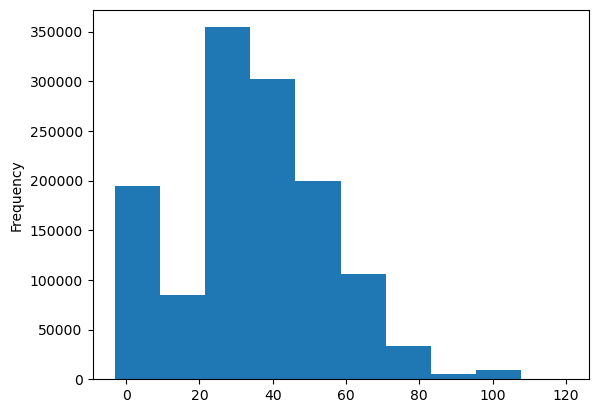

In [41]:
# Histogram using the current unadjusted Victim Age data

crimeDataAdj['Victim Age'].plot(kind ="hist")

- The '0' values and the '120' appear to really skew the data so these will be removed. 

In [42]:
# Victim Age feature with all values <=0 and >115 removed

crimeDataAdj['Victim Age'] = crimeDataAdj['Victim Age'].apply(lambda x: None if (x<=0 or x>115) else x)

<Axes: ylabel='Frequency'>

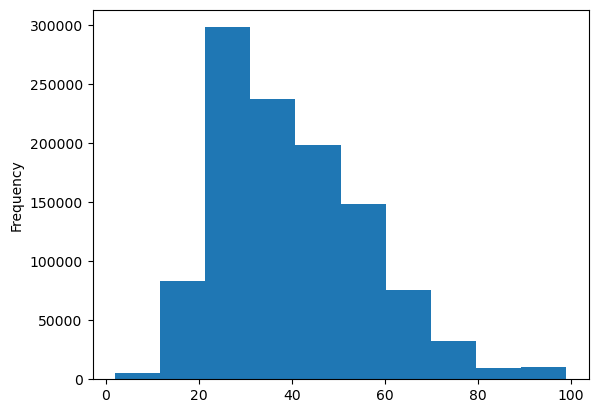

In [43]:
crimeDataAdj['Victim Age'].plot(kind = "hist")

In [46]:
round(crimeDataAdj['Victim Age'].describe(),0)

count    1099314.0
mean          40.0
std           16.0
min            2.0
25%           28.0
50%           37.0
75%           51.0
max           99.0
Name: Victim Age, dtype: float64

## 1.8 Save the data <a id='1.8_Save_data'></a>

In [ ]:
#crimeDataAdj.to_csv('2010-2023 Crime_Traffic_Collisions_Data_R1 .csv')

## 1.9 Summary <a id='1.9_Summary'></a>

**Assignment Questions + Answers**
- Do you think you may have the data you need to tackle the desired question? <span style="color:blue">Yes</span>
    - Have you identified the required target value? <span style="color:blue">Victim Age and Victim Sex</span>
    - Do you have potentially useful features? <span style="color:blue">Yes</span>
- Do you have any fundamental issues with the data? <span style="color:blue">No</span>
- What kind of cleaning steps did you perform? <span style="color:blue">Removed outliers from Victim Age, converted date values within Date Reported & Date Occurred from 'str' to 'datetime', replaced missing values from Victim Sex with 'X' to represent unknown, and replaced Victim Descent values codes with descriptive words for anyone to understand without using an LAPD code reference.</span>
- How did you deal with missing values, if there were any? <span style="color:blue">Replaced missing values with specific 'str' to represent unknowns and left most missing values as they represent <1% of the data</span>
- Were there outliers, and how did you handle them? <span style="color:blue">Yes, there were errors within the Victim Age column such as an age of 120, 0, and negative values - these were all removed to better represent the mean age.</span>